In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/youtube_data.csv")
df.head()
df.shape
df.describe()

,Unnamed: 0,Likes,Comments,Views
count,1881.000000,1.879000e+03,1879.000000,1.879000e+03
mean,940.000000,1.700610e+05,7863.331559,1.161292e+07
std,543.142247,7.962293e+05,37879.964926,1.084450e+08
min,0.000000,-1.000000e+00,-1.000000,2.500000e+01
25%,470.000000,2.672500e+03,199.000000,8.451500e+04
50%,940.000000,1.478700e+04,814.000000,5.917210e+05
75%,1410.000000,6.090600e+04,3377.500000,2.804978e+06
max,1880.000000,1.644556e+07,732818.000000,4.034122e+09


In [115]:
df.sample(5)

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
1561,1561,Nintendo Switch OLED Review Vs Original | One ...,TlBU5LfBEcM,2021-11-03,nintendo,8058.0,662.0,566503.0
191,191,How To Beat EVERY DEATH GAME In &quot;Die Now&...,joAOl1CVlpE,2022-07-31,how-to,28603.0,1300.0,855958.0
1724,1724,Rishtey (2002) (HD) Hindi Full Movie - Anil Ka...,BGNE4WaTx-k,2019-01-15,movies,56258.0,1185.0,3505369.0
237,237,business 101 everything you need to know about...,RFDaxPoGA6U,2018-09-14,business,25934.0,424.0,1102647.0
1310,1310,"Last To Leave VR Wins $20,000",RCvnytndd9c,2019-06-08,mrbeast,2135851.0,91698.0,93319974.0


In [116]:
df.tail()

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
1876,1876,Should You Learn Machine Learning?,AO6urf07KjE,2021-06-14,machine learning,10259.0,416.0,386360.0
1877,1877,Todos podemos aprender Machine learning,7ClLKBUvmRk,2017-10-08,machine learning,2981.0,72.0,431421.0
1878,1878,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0
1879,1879,What is Machine Learning?,f_uwKZIAeM0,2017-01-11,machine learning,NaN,NaN,NaN
1880,1880,Don&#39;t learn machine learning,cyLWtMSry58,2020-03-30,machine learning,NaN,NaN,NaN


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1881 non-null   int64  
 1   Title         1881 non-null   object 
 2   Video ID      1881 non-null   object 
 3   Published At  1881 non-null   object 
 4   Keyword       1881 non-null   object 
 5   Likes         1879 non-null   float64
 6   Comments      1879 non-null   float64
 7   Views         1879 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 117.7+ KB


In [118]:
df.isnull().sum()

,0
Unnamed: 0,0
Title,0
Video ID,0
Published At,0
Keyword,0
Likes,2
Comments,2
Views,2


In [119]:
df.columns

Index(['Unnamed: 0', 'Title', 'Video ID', 'Published At', 'Keyword', 'Likes',
       'Comments', 'Views'],
      dtype='object')

In [120]:
df.drop(columns=['Unnamed: 0','Video ID'],inplace=True)

In [121]:
df.dropna(inplace=True)

In [122]:
df.isnull().sum()

,0
Title,0
Published At,0
Keyword,0
Likes,0
Comments,0
Views,0


In [123]:
df.shape

(1879, 6)

In [124]:
df['title_length']=df['Title'].apply(len)

In [125]:
df['published_at'] = pd.to_datetime(df['Published At'])
df['video_age_days'] = (pd.Timestamp.now() - df['published_at']).dt.days


In [126]:
df['engagement_ratio']=df['Likes']+df['Comments']/df['Views']

In [135]:
df.drop(columns=['published_at'],inplace=True)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1879 entries, 0 to 1878
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Likes             1879 non-null   float64
 1   Comments          1879 non-null   float64
 2   Views             1879 non-null   float64
 3   title_length      1879 non-null   int64  
 4   video_age_days    1879 non-null   int64  
 5   engagement_ratio  1879 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 102.8 KB


In [139]:
df.head()

,Likes,Comments,Views,title_length,video_age_days,engagement_ratio
0,3407.0,672.0,135612.0,98,1222,3407.004955
1,76779.0,4306.0,1758063.0,31,1221,76779.002449
2,63825.0,3338.0,1564007.0,34,1222,63825.002134
3,71566.0,1426.0,922918.0,89,1222,71566.001545
4,96513.0,5155.0,1855644.0,30,1237,96513.002778


In [140]:
X=df.drop(columns=['Views','engagement_ratio'])
y=df['Views']

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [142]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [143]:
y_pred=model.predict(X_test)

In [144]:
from sklearn.metrics import r2_score,mean_squared_error
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("R2 score: ",r2)
print("MSE: ",mse)

R2 score:  0.4330343628130322
MSE:  2.4793730747031224e+16


In [145]:
X_simple = df[['Likes']]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

simple_model = LinearRegression()
simple_model.fit(X_train_s, y_train_s)

y_pred_s = simple_model.predict(X_test_s)

print("Simple Regression R²:", r2_score(y_test_s, y_pred_s))

Simple Regression R²: 0.4412762586261646


In [146]:
df.head()

,Likes,Comments,Views,title_length,video_age_days,engagement_ratio
0,3407.0,672.0,135612.0,98,1222,3407.004955
1,76779.0,4306.0,1758063.0,31,1221,76779.002449
2,63825.0,3338.0,1564007.0,34,1222,63825.002134
3,71566.0,1426.0,922918.0,89,1222,71566.001545
4,96513.0,5155.0,1855644.0,30,1237,96513.002778


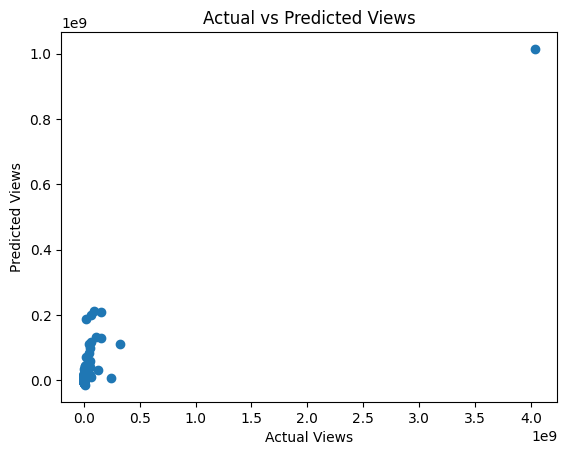

In [147]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")
plt.title("Actual vs Predicted Views")
plt.show()


In [148]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

importance


,Feature,Coefficient
0,Likes,78.522862
1,Comments,-392.446795
2,title_length,94338.503807
3,video_age_days,8133.611030


/tmp/ipython-input-846096909.py:3: RuntimeWarning: invalid value encountered in log1p
  plt.scatter(np.log1p(y_test), np.log1p(y_pred))


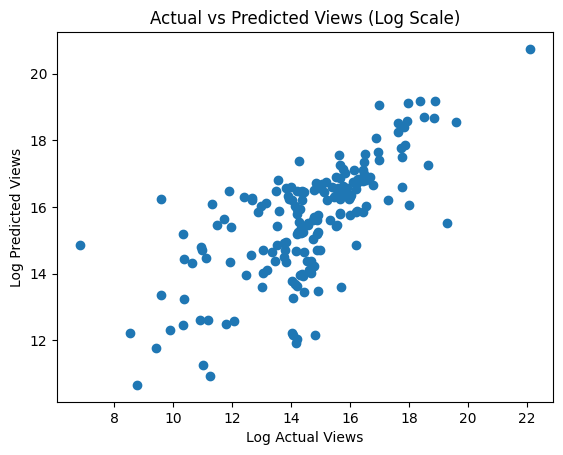

In [149]:
import numpy as np

plt.scatter(np.log1p(y_test), np.log1p(y_pred))
plt.xlabel("Log Actual Views")
plt.ylabel("Log Predicted Views")
plt.title("Actual vs Predicted Views (Log Scale)")
plt.show()


In [150]:
import pickle

with open("youtube_views_prediction.pkl", "wb") as f:
    pickle.dump(model, f)

In [151]:
!pip install gradio

In [152]:
with open("youtube_views_prediction.pkl", "rb") as f:
    model = pickle.load(f)

In [153]:
df.head()

,Likes,Comments,Views,title_length,video_age_days,engagement_ratio
0,3407.0,672.0,135612.0,98,1222,3407.004955
1,76779.0,4306.0,1758063.0,31,1221,76779.002449
2,63825.0,3338.0,1564007.0,34,1222,63825.002134
3,71566.0,1426.0,922918.0,89,1222,71566.001545
4,96513.0,5155.0,1855644.0,30,1237,96513.002778


In [154]:
def predict_views(Likes,Comments,title_length,video_age_days,engagement_ratio):
  prediction=model.predict([[Likes,
  Comments,
  title_length,
  video_age_days,
  ]])
  return int(prediction[0])

In [155]:
import gradio as gr
interface=gr.Interface(
    fn=predict_views,
    inputs=[
        gr.Number(label="Likes"),
        gr.Number(label="Comments"),
        gr.Number(label="Title Length"),
        gr.Number(label="Video age days"),
    ],
    outputs=gr.Number(label="Views"),
    title="YouTube Video Views Predictor",
    description="Predict YouTube video views using Linear Regression"
)

interface.launch()

/usr/local/lib/python3.12/dist-packages/gradio/utils.py:1052: UserWarning: Expected 5 arguments for function <function predict_views at 0x796f8c6fc720>, received 4.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/gradio/utils.py:1056: UserWarning: Expected at least 5 arguments for function <function predict_views at 0x796f8c6fc720>, received 4.
  warnings.warn(


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dd3149c0945b89412f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
